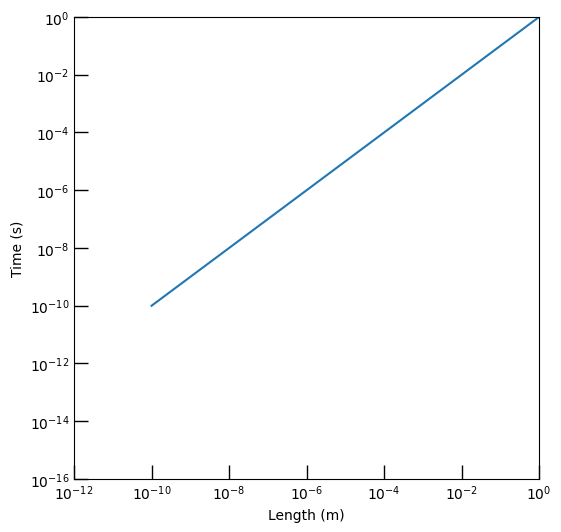

In [32]:
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, NullFormatter, AutoMinorLocator
# Create the plot with square aspect ratio
plt.figure(figsize=(6, 6))

# Add labels and title with larger font
plt.xlabel('Length (m)')
plt.ylabel('Time (s)')

# Show ticks on all sides and add minor ticks
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))


ax.tick_params(which='major', length=10, width=1.0, direction='in', labelsize=10)
ax.tick_params(which='minor', length=5, width=1.0, direction='in', labelsize=8)
# ax.tick_params(top=True, right=True)

# ax.set_xticks([1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1])
# ax.set_yticks([1e-14, 1e-12, 1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1])

# ax.xaxis.set_minor_locator(LogLocator(subs="auto") )
# ax.xaxis.set_minor_formatter(NullFormatter())

# ax.yaxis.set_minor_locator(LogLocator(subs="auto") )
# ax.yaxis.set_minor_formatter(NullFormatter())


# Ensure that the tick labels include the value 1
ax.set_xlim(1e-12, 1)
ax.set_ylim(1e-16, 1)
# Use LaTeX-style fonts for better PDF compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# Add a sample plot (replace with your actual data)
import numpy as np
x = np.logspace(-10, 2, 100)
y = x
plt.loglog(x, y)

plt.savefig('loglog.pdf')

In [ ]:
from pymatgen.core import Structure

# create a structure with a line of positive and negative charges
structure = Structure(
    lattice=[[10, 0, 0], [0, 10, 0], [0, 0, 10]],
    species=["Li", "Li", "Li", "Li", "Li"],
    coords=[[0, 0, 0], [1, 0, 0], [2, 0, 0], [3, 0, 0], [4, 0, 0]],
    site_properties={"charge": [1, 1, 1, 1, 1]}
)
print(structure)

# calculate ewald sum
from pymatgen.analysis.ewald import EwaldSummation
ewald = EwaldSummation(structure)
print(ewald.total_energy)
print(ewald.point_energy)
print(ewald.real_space_energy)

# Define positions and potentials
positions = np.linspace(-5, 5, 100)
total_potential = np.array([ewald.get_site_energy(i) for i, site in enumerate(structure.sites)])
real_potential = np.array([ewald.get_site_energy_real(site) for site in structure.sites])
recip_potential = np.array([ewald.get_site_energy_recip(site) for site in structure.sites])

# Plot total charge distribution as a function of x position
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Total charge distribution
ax1.plot(positions, total_potential, label='Total Potential')
ax1.set_title('Ewald Summation (Total)')
ax1.set_xlabel('Position')
ax1.set_ylabel('Potential')
ax1.legend()

# Real space charge distribution
ax2.plot(positions, real_potential, label='Real Space Potential', color='g')
ax2.set_title('Real Space Sum')
ax2.set_xlabel('Position')
ax2.legend()

# Reciprocal space charge distribution
ax3.plot(positions, recip_potential, label='Reciprocal Space Potential', color='r')
ax3.set_title('Reciprocal Space Sum')
ax3.set_xlabel('Position')
ax3.legend()


plt.tight_layout()
plt.show()

Full Formula (Li5)
Reduced Formula: Li
abc   :  10.000000  10.000000  10.000000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (5)
  #  SP      a    b    c    charge
---  ----  ---  ---  ---  --------
  0  Li      0    0    0         1
  1  Li      1    0    0         1
  2  Li      2    0    0         1
  3  Li      3    0    0         1
  4  Li      4    0    0         1
-3.7088134333484843
-8.886504638513825
0.21523763729302575


AttributeError: 'EwaldSummation' object has no attribute 'get_site_energy_real'

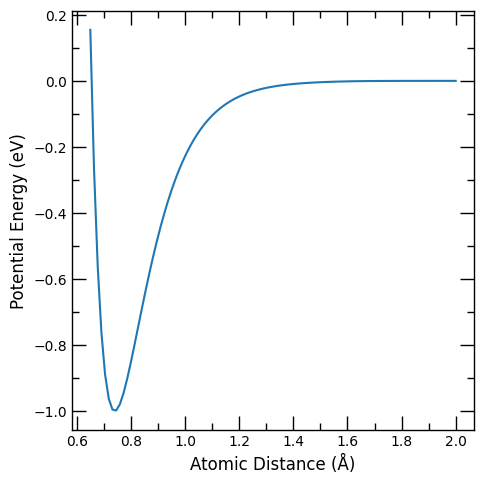

In [11]:
import numpy as np
from ase.calculators.morse import MorsePotential
from ase import Atoms
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, NullFormatter, AutoMinorLocator
import matplotlib as mpl

mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# Create a range of distances
distances = np.linspace(0.65, 2, 100)

# Initialize Morse potential calculator
morse_calculator = MorsePotential(D0=0.3429, alpha=1.02, r0=0.74)

# Calculate energies for each distance
energies = []
for d in distances:
    h2 = Atoms('H2', positions=[[0, 0, 0], [0, 0, d]])
    h2.calc = morse_calculator
    energies.append(h2.get_potential_energy())

fig,ax = plt.subplots(figsize=(5, 5))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))


ax.tick_params(which='major', length=10, width=1.0, direction='in', labelsize=10)
ax.tick_params(which='minor', length=5, width=1.0, direction='in', labelsize=8, top=True, right=True)
ax.tick_params(top=True, right=True)


# Plot the results
ax.plot(distances, energies)
ax.set_xlabel('Atomic Distance (Å)')
ax.set_ylabel('Potential Energy (eV)')
fig.tight_layout()
fig.savefig('morse_potential.pdf')

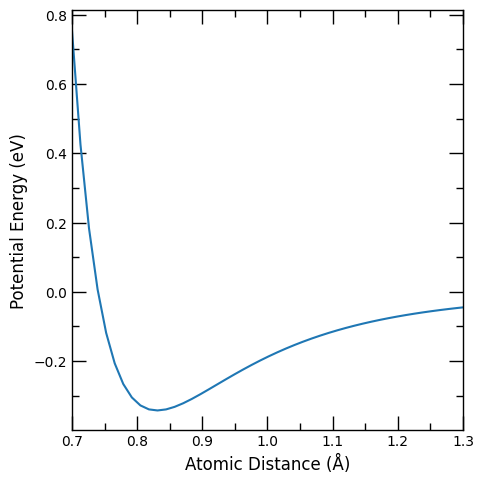

In [17]:
# Define Lennard-Jones potential function
def lennard_jones_potential(r, epsilon=0.3429, sigma=0.74):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

# Create a range of distances
distances = np.linspace(0.7, 2, 100)

# Calculate Lennard-Jones potential for each distance
lj_energies = lennard_jones_potential(distances)

fig, ax = plt.subplots(figsize=(5, 5))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

ax.tick_params(which='major', length=10, width=1.0, direction='in', labelsize=10)
ax.tick_params(which='minor', length=5, width=1.0, direction='in', labelsize=8, top=True, right=True)
ax.tick_params(top=True, right=True)
ax.set_xlim(0.7,1.3)
# Plot the Lennard-Jones potential
ax.plot(distances, lj_energies)
ax.set_xlabel('Atomic Distance (Å)')
ax.set_ylabel('Potential Energy (eV)')
fig.tight_layout()
fig.savefig('lennard_jones_potential.pdf')
plt.show()


Approximation of π: 3.1362
Error: 0.005392653589793017


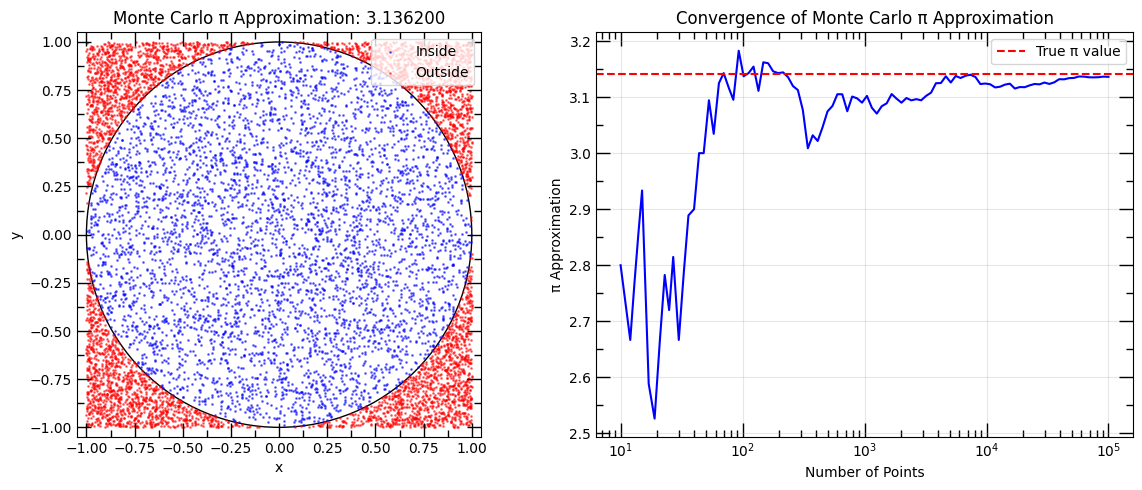

In [3]:
# Monte Carlo simulation to compute π with step-by-step tracking
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Number of points to use in the simulation
n_points = 100000
inside_circle = 0
x_inside, y_inside = [], []
x_outside, y_outside = [], []

# Track pi approximation at different steps
tracking_points = np.logspace(1, np.log10(n_points), num=100).astype(int)
tracking_points = sorted(list(set(tracking_points)))
pi_estimates = []
steps = []

# Run the Monte Carlo simulation
for i in range(n_points):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    distance = x**2 + y**2
    
    if distance <= 1:
        inside_circle += 1
        x_inside.append(x)
        y_inside.append(y)
    else:
        x_outside.append(x)
        y_outside.append(y)
    
    # Record the approximation at specified tracking points
    if i+1 in tracking_points:
        pi_approx = 4 * inside_circle / (i+1)
        pi_estimates.append(pi_approx)
        steps.append(i+1)

# Calculate final π approximation
pi_approx = 4 * inside_circle / n_points
print(f"Approximation of π: {pi_approx}")
print(f"Error: {abs(pi_approx - np.pi)}")

# Create a single figure with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Apply the consistent style to both axes
for ax in [ax1, ax2]:
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.tick_params(which='major', length=10, width=1.0, direction='in', labelsize=10)
    ax.tick_params(which='minor', length=5, width=1.0, direction='in', labelsize=8, top=True, right=True)
    ax.tick_params(top=True, right=True)

# Panel 1: Monte Carlo points
# Plot the unit circle
circle = plt.Circle((0, 0), 1, fill=False, color='black', linestyle='-')
ax1.add_artist(circle)

# Plot sample points (using a smaller subset for clarity)
sample_size = 5000
ax1.scatter(x_inside[:sample_size], y_inside[:sample_size], s=1, color='blue', alpha=0.5, label='Inside')
ax1.scatter(x_outside[:sample_size], y_outside[:sample_size], s=1, color='red', alpha=0.5, label='Outside')

# Add square boundaries
ax1.set_xlim(-1.05, 1.05)
ax1.set_ylim(-1.05, 1.05)
ax1.set_aspect('equal')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title(f'Monte Carlo π Approximation: {pi_approx:.6f}')
ax1.legend(loc='upper right')

# Panel 2: Convergence plot
ax2.plot(steps, pi_estimates, 'b-')
ax2.axhline(y=np.pi, color='r', linestyle='--', label='True π value')
ax2.set_xscale('log')
ax2.set_xlabel('Number of Points')
ax2.set_ylabel('π Approximation')
ax2.set_title('Convergence of Monte Carlo π Approximation')
ax2.legend()
ax2.grid(True, alpha=0.3)

fig.tight_layout()
fig.savefig('monte_carlo_pi_combined.pdf')
plt.show()


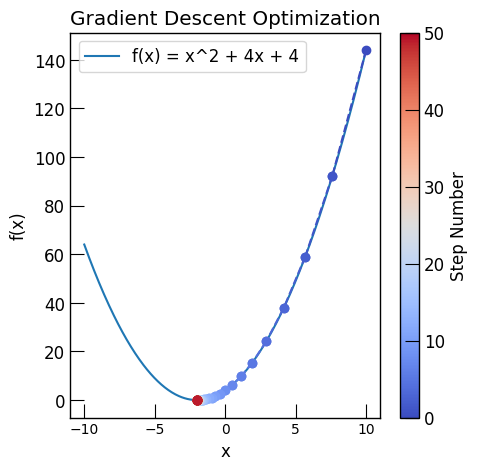

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib as mpl

mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
# Define the function to minimize (e.g., a simple quadratic function)
def f(x):
    return x**2 + 4*x + 4

# Define the gradient of the function
def grad_f(x):
    return 2*x + 4

# Gradient descent parameters
learning_rate = 0.1
n_iterations = 50
x_start = 10

# Perform gradient descent
x_values = [x_start]
for _ in range(n_iterations):
    x_new = x_values[-1] - learning_rate * grad_f(x_values[-1])
    x_values.append(x_new)

# Generate x values for plotting the function
x_plot = np.linspace(-10, 10, 400)
y_plot = f(x_plot)

# Plot the function and the gradient descent trajectory
plt.figure(figsize=(5, 5))
plt.plot(x_plot, y_plot, label='f(x) = x^2 + 4x + 4')

# Use a colormap to show the number of steps
norm = Normalize(vmin=0, vmax=len(x_values) - 1)
colors = plt.cm.coolwarm(norm(range(len(x_values))))
for i in range(len(x_values) - 1):
    plt.plot(x_values[i:i+2], [f(x_values[i]), f(x_values[i+1])], color=colors[i], marker='o', ls='--')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Optimization')
plt.legend()

# Create a new axis for the colorbar
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='coolwarm'), ax=plt.gca(), label='Step Number')
# plt.show()
plt.savefig('gd.pdf')

Global minimum found at: [-2.00938303]
Function value at global minimum: 23.707243137267657


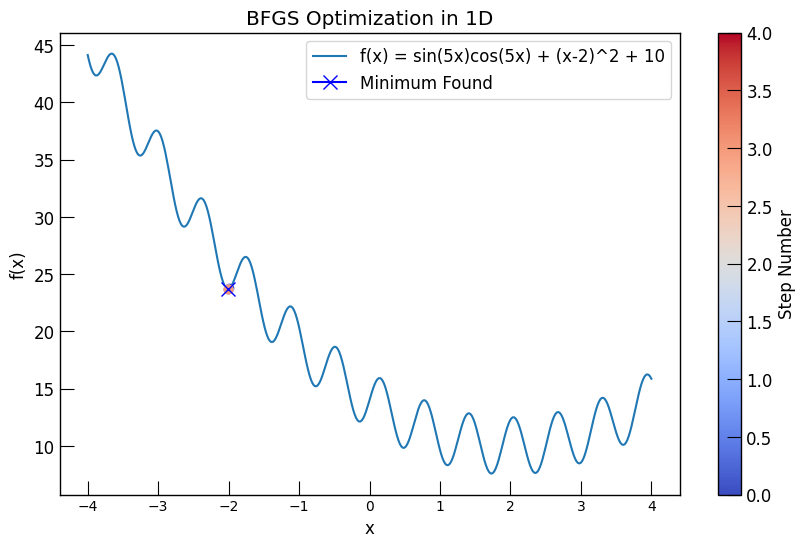

In [80]:
from scipy.optimize import minimize

# Define the complex 1D function to minimize with deeper and wider local minima
def f(x):
    return 5 * np.sin(5 * x) * np.cos(5 * x) + (x - 2)**2 + 10

# Define the gradient of the complex 1D function
def grad_f(x):
    df_dx = 5 * (5 * np.cos(5 * x) * np.cos(5 * x) - 5 * np.sin(5 * x) * np.sin(5 * x)) + 2 * (x - 2)
    return np.array([df_dx]).flatten()

# Initial guess
x0 = np.array([-3])

# List to store the trajectory
trajectory_bfgs = []

# Callback function to record the trajectory
def callback_bfgs(x):
    trajectory_bfgs.append(np.copy(x))

# Perform BFGS optimization
result_bfgs = minimize(f, x0, method='BFGS', jac=grad_f, callback=callback_bfgs)

print("Global minimum found at:", result_bfgs.x)
print("Function value at global minimum:", result_bfgs.fun)

# Convert trajectory to numpy array for easier plotting
trajectory_bfgs = np.array(trajectory_bfgs).flatten()

# Generate x values for plotting the function
x_plot = np.linspace(-4, 4, 400)
y_plot = f(x_plot)

# Plot the function and the optimization path
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='f(x) = sin(5x)cos(5x) + (x-2)^2 + 10')

# Use a colormap to show the sequence of points in the trajectory
norm = Normalize(vmin=0, vmax=len(trajectory_bfgs) - 1)
colors = plt.cm.coolwarm(norm(range(len(trajectory_bfgs))))
for i in range(len(trajectory_bfgs) - 1):
    plt.plot(trajectory_bfgs[i:i+2], f(trajectory_bfgs[i:i+2]), color=colors[i], marker='o', ls='--')

plt.plot(result_bfgs.x, result_bfgs.fun, marker='x', color='blue', markersize=10, label='Minimum Found')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('BFGS Optimization in 1D')
plt.legend()

# Create a colorbar to show the sequence of points
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='coolwarm'), ax=plt.gca(), label='Step Number')
plt.savefig('bfgs.pdf')

/var/folders/b4/hm0mlm2x6_g1cbpp4c29f62h0000gn/T/ipykernel_23667/2612798967.py:79: RuntimeWarning: Method BFGS cannot handle bounds.
  bfgs_result = minimize(complex_function, x0, method='BFGS', jac=gradient,


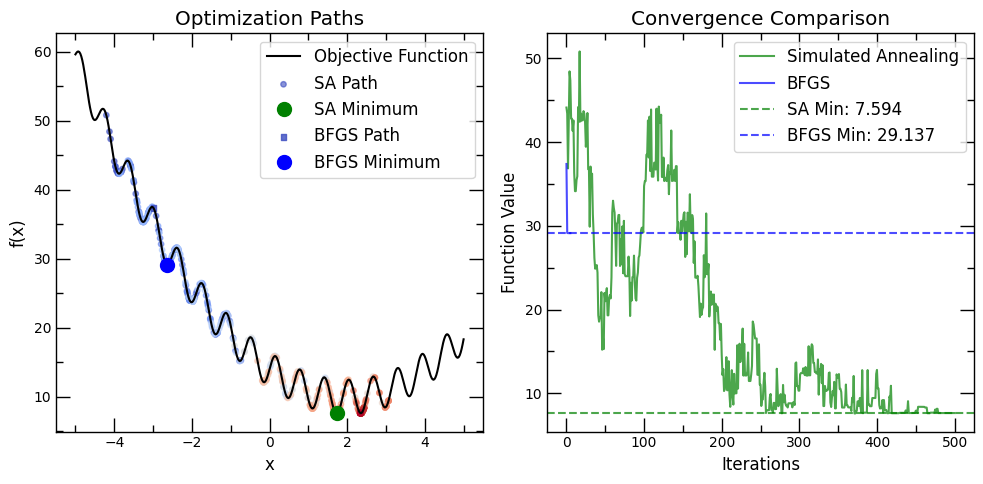

Simulated Annealing minimum found at x = 1.742688, f(x) = 7.593584
BFGS minimum found at x = -2.632389, f(x) = 29.137040


In [63]:
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.ticker import AutoMinorLocator
from scipy.optimize import minimize

import matplotlib.pyplot as plt

# Define a complex 1D function with multiple local minima
def complex_function(x):
    return 5 * np.sin(5 * x) * np.cos(5 * x) + (x - 2)**2 + 10

# Implement simulated annealing algorithm
def simulated_annealing(func, x0, bounds, n_iterations=1000, 
                        temp_start=5.0, temp_end=0.001, step_size=0.5):
    # Initialize variables
    current_temp = temp_start
    cooling_rate = (temp_start - temp_end) / n_iterations
    current_state = x0
    current_energy = func(current_state)
    best_state = current_state
    best_energy = current_energy
    states_history = [current_state]
    energy_history = [current_energy]
    
    # Run the algorithm
    for i in range(n_iterations):
        # Generate a random neighbor
        neighbor = current_state + np.random.uniform(-step_size, step_size)
        # Keep the solution within bounds
        neighbor = np.clip(neighbor, bounds[0], bounds[1])
        
        # Calculate current energy and the new energy
        neighbor_energy = func(neighbor)
        
        # Decide if we should accept the neighbor
        if neighbor_energy < current_energy:
            # Accept better solutions
            current_state = neighbor
            current_energy = neighbor_energy
        else:
            # Accept worse solutions with a probability
            p = np.exp(-(neighbor_energy - current_energy) / current_temp)
            if np.random.random() < p:
                current_state = neighbor
                current_energy = neighbor_energy
        
        # Update the best state if needed
        if current_energy < best_energy:
            best_state = current_state
            best_energy = current_energy
        
        # Record history
        states_history.append(current_state)
        energy_history.append(current_energy)
        
        # Cool down
        current_temp -= cooling_rate
    
    return best_state, best_energy, states_history, energy_history

# Set the bounds and initial point
bounds = (-5, 5)
x0 = np.array(-4.0)

# Run simulated annealing
sa_result, sa_energy, sa_trajectory, sa_energies = simulated_annealing(
    complex_function, x0, bounds, n_iterations=500, temp_start=10.0, temp_end=0.001
)

# Run gradient-based optimization (BFGS) for comparison
def gradient(x):
    return 5 * (5 * np.cos(5 * x) * np.cos(5 * x) - 5 * np.sin(5 * x) * np.sin(5 * x)) + 2 * (x - 2)

# Track BFGS trajectory
bfgs_trajectory = []
def callback_bfgs(x):
    bfgs_trajectory.append(np.copy(x))

bfgs_result = minimize(complex_function, x0, method='BFGS', jac=gradient, 
                       callback=callback_bfgs, bounds=[bounds])

# Generate x values for plotting the function
x_plot = np.linspace(bounds[0], bounds[1], 400)
y_plot = complex_function(x_plot)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Apply consistent styling to both axes
for ax in [ax1, ax2]:
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.tick_params(which='major', length=10, width=1.0, direction='in', labelsize=10)
    ax.tick_params(which='minor', length=5, width=1.0, direction='in', labelsize=8, top=True, right=True)
    ax.tick_params(top=True, right=True)

# Plot the function and optimization paths on first subplot
ax1.plot(x_plot, y_plot, 'k-', label='Objective Function')

# Use a colormap to show the sequence of points in the SA trajectory
norm = Normalize(vmin=0, vmax=len(sa_trajectory) - 1)
cmap = plt.cm.coolwarm
colors = cmap(norm(range(len(sa_trajectory))))

# Plot SA trajectory
ax1.scatter(sa_trajectory, [complex_function(x) for x in sa_trajectory], 
          c=colors, s=15, alpha=0.6, label='SA Path')
ax1.plot(sa_result, sa_energy, 'go', markersize=10, label='SA Minimum')

# Plot BFGS trajectory
bfgs_colors = plt.cm.coolwarm(norm(range(len(bfgs_trajectory))))
ax1.scatter(bfgs_trajectory, [complex_function(x) for x in bfgs_trajectory], 
          c=bfgs_colors, s=15, alpha=0.8, marker='s', label='BFGS Path')
ax1.plot(bfgs_result.x, bfgs_result.fun, 'bo', markersize=10, label='BFGS Minimum')

ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_title('Optimization Paths')
ax1.legend()

# Plot the energy evolution on second subplot
ax2.plot(sa_energies, 'g-', alpha=0.7, label='Simulated Annealing')
ax2.plot([complex_function(x) for x in bfgs_trajectory], 'b-', alpha=0.7, label='BFGS')
ax2.axhline(y=sa_energy, color='g', linestyle='--', alpha=0.7, 
           label=f'SA Min: {sa_energy:.3f}')
ax2.axhline(y=bfgs_result.fun, color='b', linestyle='--', alpha=0.7, 
           label=f'BFGS Min: {bfgs_result.fun:.3f}')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Function Value')
ax2.set_title('Convergence Comparison')
ax2.legend()

plt.tight_layout()
plt.savefig('simulated_annealing_vs_bfgs.pdf')
plt.show()

print(f"Simulated Annealing minimum found at x = {sa_result:.6f}, f(x) = {sa_energy:.6f}")
print(f"BFGS minimum found at x = {bfgs_result.x[0]:.6f}, f(x) = {bfgs_result.fun:.6f}")

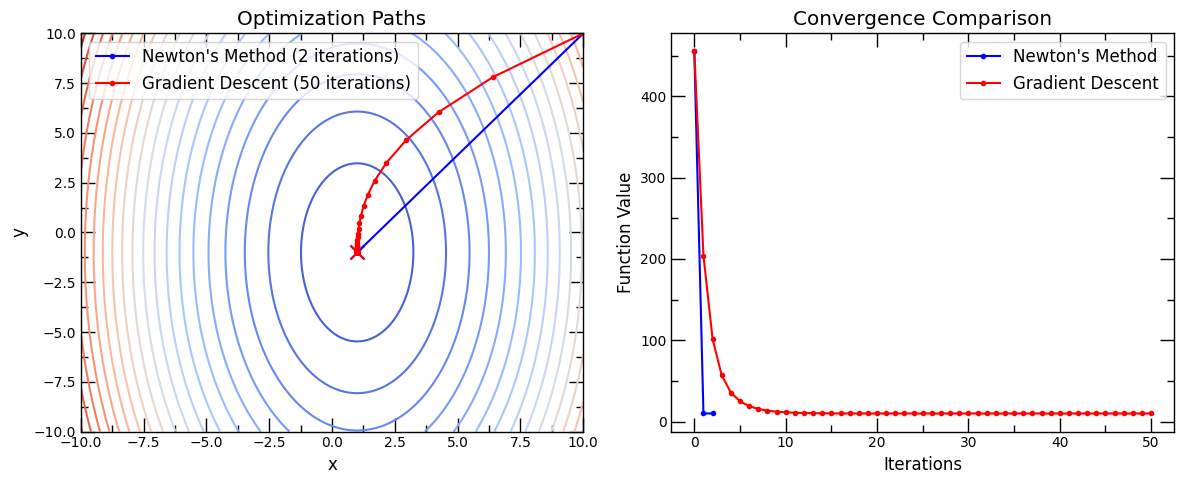

Newton's Method: Minimum found at x = [ 1. -1.], f(x) = 10.000000 after 2 iterations
Gradient Descent: Minimum found at x = [ 1.       -0.999843], f(x) = 10.000000 after 50 iterations


In [26]:
# Newton's Method and Gradient Descent Comparison

# Define the 2D function to minimize (e.g., a simple quadratic function)
def f_2d(x, y):
    return ((2*x-2)**2 + (y+1)**2) + 10

# Define the gradient of the 2D function
def grad_f_2d(x, y):
    df_dx = 4 * (x - 1)
    df_dy = 2 * (y + 1)
    return np.array([df_dx, df_dy])

# Define the Hessian matrix of the 2D function
def hessian_f_2d(x, y):
    return np.array([[4, 0], [0, 2]])

# Newton's Method
def newtons_method(x0, tolerance=1e-6, max_iterations=50):
    x = x0
    path = [x.copy()]
    function_values = [f_2d(x[0], x[1])]
    hessian = hessian_f_2d(x[0], x[1])
    
    for i in range(max_iterations):
        grad = grad_f_2d(x[0], x[1])
        # Solve the linear system H * delta_x = -grad
        delta_x = np.linalg.solve(hessian, -grad)
        x = x + delta_x
        path.append(x.copy())
        function_values.append(f_2d(x[0], x[1]))
        
        if np.linalg.norm(grad) < tolerance:
            break
    
    return x, path, function_values, i+1

# Gradient Descent
def gradient_descent(x0, learning_rate=0.1, tolerance=1e-6, max_iterations=50):
    x = x0
    path = [x.copy()]
    function_values = [f_2d(x[0], x[1])]
    
    for i in range(max_iterations):
        grad = grad_f_2d(x[0], x[1])
        x = x - learning_rate * grad
        path.append(x.copy())
        function_values.append(f_2d(x[0], x[1]))
        
        if np.linalg.norm(grad) < tolerance:
            break
    
    return x, path, function_values, i+1

# Initial guess
x0 = np.array([10, 10])

# Run both optimization methods
newton_min_x, newton_path, newton_values, newton_iterations = newtons_method(x0)
gd_min_x, gd_path, gd_values, gd_iterations = gradient_descent(x0, learning_rate=0.1)

# Convert paths to numpy arrays for easier plotting
newton_path = np.array(newton_path)
gd_path = np.array(gd_path)

# Generate x and y values for plotting the function
x_plot = np.linspace(-10, 10, 400)
y_plot = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x_plot, y_plot)
Z = f_2d(X, Y)

# Plot the function and the optimization paths
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Apply consistent styling to both axes
for ax in [ax1, ax2]:
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.tick_params(which='major', length=10, width=1.0, direction='in', labelsize=10)
    ax.tick_params(which='minor', length=5, width=1.0, direction='in', labelsize=8, top=True, right=True)
    ax.tick_params(top=True, right=True)

# Plot optimization paths on contour
contour = ax1.contour(X, Y, Z, levels=20, cmap='coolwarm')
ax1.plot(newton_path[:, 0], newton_path[:, 1], 'b.-', label=f'Newton\'s Method ({newton_iterations} iterations)')
ax1.plot(gd_path[:, 0], gd_path[:, 1], 'r.-', label=f'Gradient Descent ({gd_iterations} iterations)')
ax1.scatter(newton_min_x[0], newton_min_x[1], color='blue', s=100, marker='x')
ax1.scatter(gd_min_x[0], gd_min_x[1], color='red', s=100, marker='x')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Optimization Paths')
ax1.legend()

# Plot function value vs iterations
iterations_newton = range(len(newton_values))
iterations_gd = range(len(gd_values))
ax2.plot(iterations_newton, newton_values, 'b.-', label='Newton\'s Method')
ax2.plot(iterations_gd, gd_values, 'r.-', label='Gradient Descent')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Function Value')
ax2.set_title('Convergence Comparison')
ax2.legend()

plt.tight_layout()
plt.savefig('newton_vs_gradient_descent.pdf')
plt.show()

print(f"Newton's Method: Minimum found at x = {newton_min_x}, f(x) = {f_2d(newton_min_x[0], newton_min_x[1]):.6f} after {newton_iterations} iterations")
print(f"Gradient Descent: Minimum found at x = {gd_min_x}, f(x) = {f_2d(gd_min_x[0], gd_min_x[1]):.6f} after {gd_iterations} iterations")

/var/folders/b4/hm0mlm2x6_g1cbpp4c29f62h0000gn/T/ipykernel_8342/438108590.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


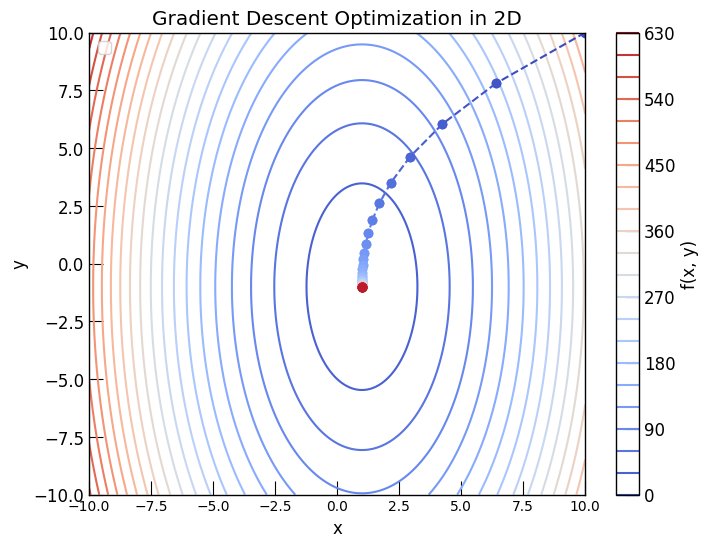

In [30]:
# Define the 2D function to minimize (e.g., a more complex function with a single minimum)
def f_2d(x, y):
    return ((2*x-2)**2 + (y+1)**2) + 10 

# Define the gradient of the 2D function
def grad_f_2d(x, y):
    df_dx = 4 * (x - 1)
    df_dy = 2 * (y + 1)
    return np.array([df_dx, df_dy])

# Gradient descent parameters
learning_rate = 0.1
n_iterations = 50
x_start = np.array([10, 10])

# Perform gradient descent
x_values_2d = [x_start]
for _ in range(n_iterations):
    x_new = x_values_2d[-1] - learning_rate * grad_f_2d(x_values_2d[-1][0], x_values_2d[-1][1])
    x_values_2d.append(x_new)

# Convert list to numpy array for easier indexing
x_values_2d = np.array(x_values_2d)

# Generate x and y values for plotting the function
x_plot = np.linspace(-10, 10, 400)
y_plot = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x_plot, y_plot)
Z = f_2d(X, Y)

# Generate a colormap to show the sequence of points in the trajectory
norm = Normalize(vmin=0, vmax=len(x_values_2d) - 1)
colors = plt.cm.coolwarm(norm(range(len(x_values_2d))))

# Plot the function and the gradient descent trajectory
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=20, cmap='coolwarm')
plt.colorbar(contour, label='f(x, y)')
# plt.plot(x_values_2d[:, 0], x_values_2d[:, 1], marker='o', color=colors[i], label='Gradient Descent Path')
for i in range(len(x_values_2d) - 1):
    plt.plot(x_values_2d[i:i+2, 0], x_values_2d[i:i+2, 1], color=colors[i], marker='o', ls='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Optimization in 2D')
plt.legend()
plt.savefig('gradient_descent_2d.pdf')

[104.0, 25.769, 5.486067079999998, 0.024219430177998547, -1.6370302046338157, -2.314289436576821, -2.7278801771373575, -3.062451596470604, -3.3657491566623405, -3.6505094005845997, -3.9204974141437066, -4.17716117257819, -4.421333055158911, -4.653665755185137, -4.874744747708092, -5.0851180588463265, -5.285304854068125, -5.47579856676931, -5.65706858655917, -5.829561536484192, -5.993702404262127, -6.149895597240754, -6.298525940781724, -6.439959626899009, -6.574545116605716, -6.702613998477772, -6.8244818056226695, -6.940448793084709, -7.050800677606915, -7.155809341573377, -7.25573350286672, -7.350819352291177, -7.44130116013171, -7.527401853343639, -7.609333564794854, -7.687298155913792, -7.761487714030888, -7.83208502563884, -7.899264026737669, -7.963190231374169, -8.024021139431518, -8.08190662467381, -8.136989304001506, -8.189404888827614, -8.23928251944028, -8.286745083175614, -8.3319095171846, -8.374887096540132, -8.415783708393903, -8.454700112858706, -8.49173219125883, -8.5269

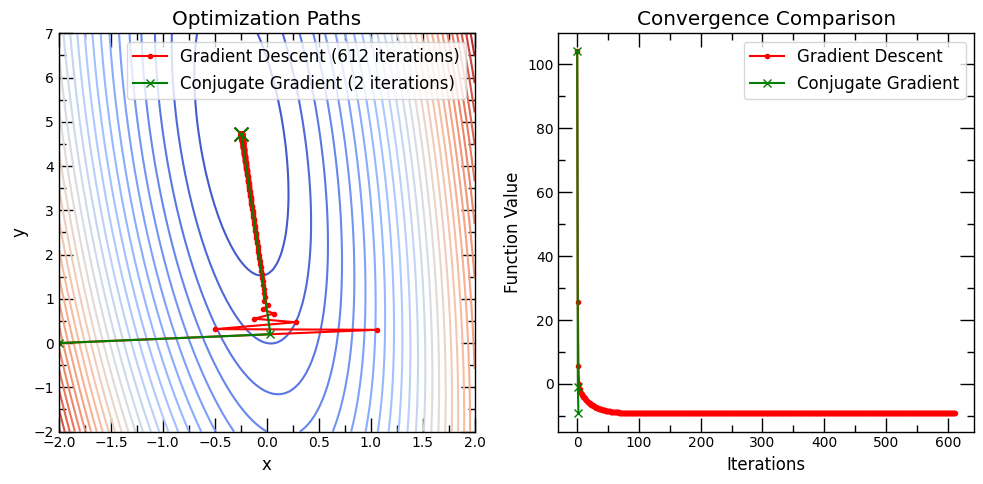

Gradient Descent: Minimum found at x = [-0.24390237  4.73170615], f(x) = -9.219512 after 612 iterations
Conjugate Gradient: Minimum found at x = [-0.24390244  4.73170732], f(x) = -9.219512 after 2 iterations


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Define a pure quadratic function to highlight CG's efficiency
def f_quadratic(x, A, b):
    return 0.5 * x.T.dot(A).dot(x) - b.T.dot(x)

# Define the gradient of the quadratic function
def grad_f_quadratic(x, A, b):
    return A.dot(x) - b

# Standard Gradient Descent
def gradient_descent(A, b, x0, learning_rate=0.001, tolerance=1e-6, max_iterations=100):
    x = x0
    path = [x.copy()]
    function_values = [f_quadratic(x, A, b)]
    
    for i in range(max_iterations):
        grad = grad_f_quadratic(x, A, b)
        x = x - learning_rate * grad
        path.append(x.copy())
        function_values.append(f_quadratic(x, A, b))
        
        if np.linalg.norm(grad) < tolerance:
            break
    
    return x, path, function_values, i+1

# Conjugate Gradient Method
def conjugate_gradient(A, b, x0, tolerance=1e-6, max_iterations=100):
    x = x0.copy()
    r = b - A.dot(x)  # Initial residual (negative gradient for quadratic functions)
    p = r.copy()
    path = [x.copy()]
    function_values = [f_quadratic(x, A, b)]
    rsold = np.dot(r, r)
    
    for i in range(max_iterations):
        Ap = A.dot(p)
        alpha = rsold / np.dot(p, Ap)
        x = x + alpha * p
        path.append(x.copy())
        function_values.append(f_quadratic(x, A, b))
        
        r = r - alpha * Ap
        rsnew = np.dot(r, r)
        
        if np.sqrt(rsnew) < tolerance:
            break
            
        p = r + (rsnew / rsold) * p
        rsold = rsnew
    
    return x, path, function_values, i+1

# Define the quadratic function parameters - make it ill-conditioned
A = np.array([[50, 3], [3, 1]])  # Highly ill-conditioned matrix
b = np.array([2, 4])
x0 = np.array([-2, 0])  # Initial guess

# Run both optimization methods with adjusted learning rate
gd_min_x, gd_path, gd_values, gd_iterations = gradient_descent(A, b, x0, learning_rate=0.03, max_iterations=1000)
cg_min_x, cg_path, cg_values, cg_iterations = conjugate_gradient(A, b, x0)

# Convert paths to numpy arrays for easier plotting
gd_path = np.array(gd_path)
cg_path = np.array(cg_path)

# Generate data for the contour plot
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 7, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        point = np.array([X[i, j], Y[i, j]])
        Z[i, j] = f_quadratic(point, A, b)

# Plot the function and the optimization paths
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Apply consistent styling to both axes
for ax in [ax1, ax2]:
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.tick_params(which='major', length=10, width=1.0, direction='in', labelsize=10)
    ax.tick_params(which='minor', length=5, width=1.0, direction='in', labelsize=8, top=True, right=True)
    ax.tick_params(top=True, right=True)

# Plot optimization paths on contour
contour1 = ax1.contour(X, Y, Z, levels=30, cmap='coolwarm')
ax1.plot(gd_path[:, 0], gd_path[:, 1], 'r.-', label=f'Gradient Descent ({gd_iterations} iterations)')
ax1.plot(cg_path[:, 0], cg_path[:, 1], 'gx-', label=f'Conjugate Gradient ({cg_iterations} iterations)')
ax1.scatter(gd_min_x[0], gd_min_x[1], color='red', s=100, marker='x')
ax1.scatter(cg_min_x[0], cg_min_x[1], color='green', s=100, marker='x')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Optimization Paths')
ax1.legend()

# Plot function value vs iterations
iterations_gd = range(len(gd_values))
iterations_cg = range(len(cg_values))
ax2.plot(iterations_gd, gd_values, 'r.-', label='Gradient Descent')
ax2.plot(iterations_cg, cg_values, 'gx-', label='Conjugate Gradient')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Function Value')
ax2.set_title('Convergence Comparison')
print(gd_values)
# ax2.set_yscale('log')
# ax2.set_ylim(1e-10, 1e6)
ax2.legend()

plt.tight_layout()
plt.savefig('cg_vs_gradient_descent.pdf')
plt.show()

print(f"Gradient Descent: Minimum found at x = {gd_min_x}, f(x) = {f_quadratic(gd_min_x, A, b):.6f} after {gd_iterations} iterations")
print(f"Conjugate Gradient: Minimum found at x = {cg_min_x}, f(x) = {f_quadratic(cg_min_x, A, b):.6f} after {cg_iterations} iterations")


Global minimum found at: [1.73003584]
Function value at global minimum: 7.573463760500673


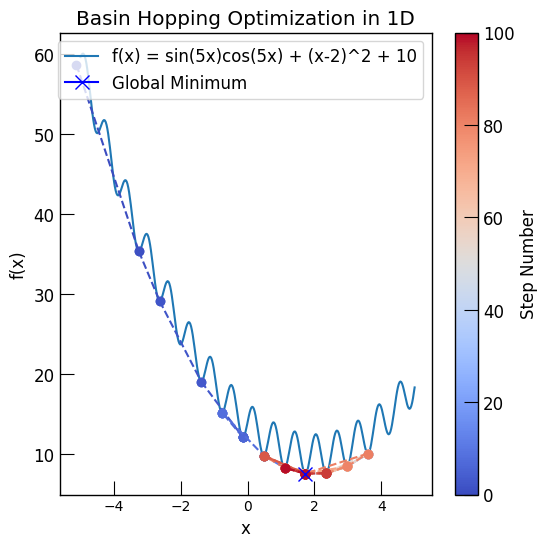

In [57]:
from scipy.optimize import basinhopping
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Define the complex 1D function to minimize with deeper and wider local minima
def complex_function_1d(x):
    return 5 * np.sin(5 * x) * np.cos(5 * x) + (x - 2)**2 + 10

# Define the gradient of the complex 1D function
def grad_complex_function_1d(x):
    df_dx = 5 * (5 * np.cos(5 * x) * np.cos(5 * x) - 5 * np.sin(5 * x) * np.sin(5 * x)) + 2 * (x - 2)
    return np.array([df_dx]).flatten()

# Initial guess
x0 = np.array([-10])

# List to store the trajectory
trajectory = []

# Callback function to record the trajectory
def callback(x, f, accept):
    trajectory.append(np.copy(x))

# Perform basin hopping optimization
result = basinhopping(complex_function_1d, x0, niter=100, minimizer_kwargs={"method": "BFGS", "jac": grad_complex_function_1d}, callback=callback)

print("Global minimum found at:", result.x)
print("Function value at global minimum:", result.fun)

# Convert trajectory to numpy array for easier plotting
trajectory = np.array(trajectory).flatten()

# Generate x values for plotting the function
x_plot = np.linspace(-5, 5, 400)
y_plot = complex_function_1d(x_plot)

# Plot the function and the optimization path
plt.figure(figsize=(6, 6))
plt.plot(x_plot, y_plot, label='f(x) = sin(5x)cos(5x) + (x-2)^2 + 10')

# Use a colormap to show the sequence of points in the trajectory
norm = Normalize(vmin=0, vmax=len(trajectory) - 1)
colors = plt.cm.coolwarm(norm(range(len(trajectory))))
for i in range(len(trajectory) - 1):
    plt.plot(trajectory[i:i+2], complex_function_1d(trajectory[i:i+2]), color=colors[i], marker='o', ls='--')

plt.plot(result.x, result.fun, marker='x', color='blue', markersize=10, label='Global Minimum')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Basin Hopping Optimization in 1D')
plt.legend()

# Create a colorbar to show the sequence of points
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='coolwarm'), ax=plt.gca(), label='Step Number')
plt.savefig('basin_hopping.pdf')

MovieWriter imagemagick unavailable; using Pillow instead.


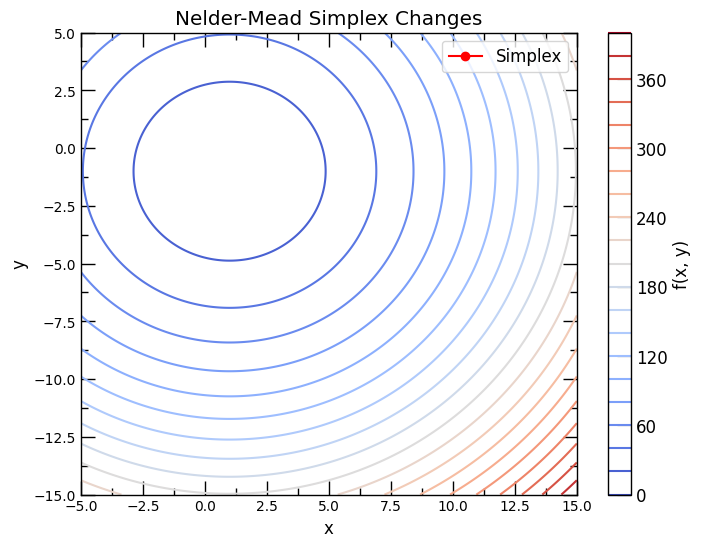

In [ ]:
from matplotlib.animation import FuncAnimation
from scipy.optimize import minimize

# Define the function to minimize
def f(x):
    return (x[0] - 1)**2 + (x[1] + 1)**2 + 5

# Perform Nelder-Mead optimization and track the trajectory
x0 = [10, 10]  # Initial guess
trajectory_nm = []  # List to store the trajectory of the simplex

def callback_nm(xk):
    trajectory_nm.append(xk.copy())

result_nm = minimize(f, x0, method='Nelder-Mead', callback=callback_nm)

# Convert trajectory to a numpy array for easier handling
trajectory_nm = np.array(trajectory_nm)

# Extract the simplex points from the optimization result
simplex_points = result_nm.final_simplex[0]

# Prepare the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Contour plot of the function
contour = ax.contour(X, Y, Z, levels=20, cmap='coolwarm')
plt.colorbar(contour, label='f(x, y)')

# Initialize the simplex plot
simplex_plot, = ax.plot([], [], 'ro-', label='Simplex')
ax.legend()

# Apply consistent styling
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='major', length=10, width=1.0, direction='in', labelsize=10)
ax.tick_params(which='minor', length=5, width=1.0, direction='in', labelsize=8, top=True, right=True)
ax.tick_params(top=True, right=True)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Nelder-Mead Simplex Changes')
# Animation update function
def update(frame):
    # Get the simplex points for the current frame
    # Ensure there are enough points to form a simplex
    if frame <= len(trajectory_nm) -3:
        current_simplex = trajectory_nm[frame:frame + 3]
        simplex_plot.set_data(current_simplex[:, 0], current_simplex[:, 1])
        simplex_plot.set_linestyle('-')
        # Close the triangle by adding the first point at the end
        triangle_x = list(current_simplex[:, 0]) + [current_simplex[0, 0]]
        triangle_y = list(current_simplex[:, 1]) + [current_simplex[0, 1]]
        simplex_plot.set_data(triangle_x, triangle_y)
    else:
        simplex_plot.set_data([], [])  # Clear the plot if not enough points
    return simplex_plot,

# Create the animation
n_frames = len(trajectory_nm)
ani = FuncAnimation(fig, update, frames=n_frames, interval=200, blit=True)

# Save the animation as a GIF
ani.save('nelder_mead_simplex.gif', writer='imagemagick')

plt.show()


/Users/zeyudeng/apps/matsci/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/zeyudeng/apps/matsci/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/zeyudeng/apps/matsci/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnin

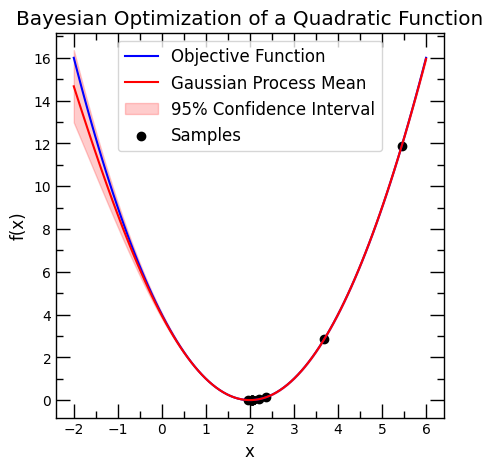

In [56]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.stats import norm
from matplotlib.ticker import AutoMinorLocator

import matplotlib.pyplot as plt

# Define the quadratic objective function
def objective(x):
    return (x - 2)**2  # Minimum at x=2

# Define the complex 1D function to minimize with deeper and wider local minima
# def objective(x):
#     return 5 * np.sin(5 * x) * np.cos(5 * x) + (x - 2)**2 + 10

# Define the Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-3, 1e3))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Define the acquisition function (Upper Confidence Bound)
def acquisition(x, gp, xi=0.05):
    mu, sigma = gp.predict(x.reshape(-1, 1)), gp.predict(x.reshape(-1, 1), return_std=True)[1]
    mu = mu.flatten()
    return mu + xi * sigma

# Bayesian optimization algorithm
def bayesian_optimization(objective, gp, acquisition, bounds, n_iter=10, n_initial=2):
    # Generate initial data
    X_sample = np.random.uniform(bounds[0], bounds[1], n_initial)
    Y_sample = np.array([objective(x) for x in X_sample])

    # Fit the Gaussian Process model
    gp.fit(X_sample.reshape(-1, 1), Y_sample)

    # Bayesian optimization loop
    for i in range(n_iter):
        # Find the next point to sample
        X_next = np.linspace(bounds[0], bounds[1], 100)
        Y_next = acquisition(X_next, gp)
        x_next = X_next[np.argmin(Y_next)]

        # Sample the objective function
        y_next = objective(x_next)

        # Add the new data to the existing data
        X_sample = np.append(X_sample, x_next)
        Y_sample = np.append(Y_sample, y_next)

        # Fit the Gaussian Process model
        gp.fit(X_sample.reshape(-1, 1), Y_sample)
    return gp, X_sample, Y_sample

# Define the bounds of the optimization
bounds = (-2, 6)

# Run the Bayesian optimization
gp, X_sample, Y_sample = bayesian_optimization(objective, gp, acquisition, bounds)

# Plot the results
X_plot = np.linspace(bounds[0], bounds[1], 100)
mu, sigma = gp.predict(X_plot.reshape(-1, 1)), gp.predict(X_plot.reshape(-1, 1), return_std=True)[1]
mu = mu.flatten()

fig, ax = plt.subplots(figsize=(5, 5))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

ax.tick_params(which='major', length=10, width=1.0, direction='in', labelsize=10)
ax.tick_params(which='minor', length=5, width=1.0, direction='in', labelsize=8, top=True, right=True)
ax.tick_params(top=True, right=True)

ax.plot(X_plot, objective(X_plot), label='Objective Function', color='blue')
ax.plot(X_plot, mu, label='Gaussian Process Mean', color='red')
ax.fill_between(X_plot, mu - 1.96 * sigma, mu + 1.96 * sigma, alpha=0.2, color='red', label='95% Confidence Interval')
ax.scatter(X_sample, Y_sample, label='Samples', color='black')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Bayesian Optimization of a Quadratic Function')
ax.legend()
plt.savefig('bayesian_optimization.pdf')
plt.show()

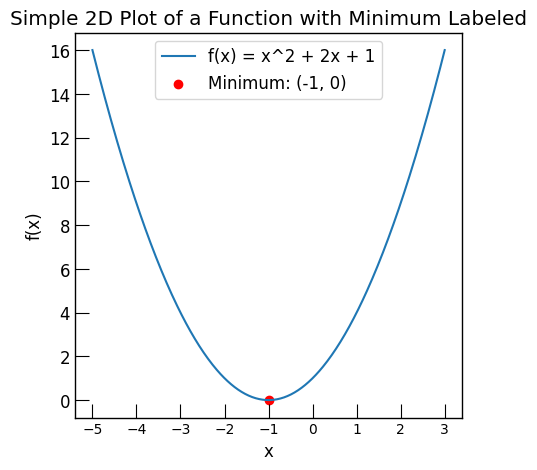

In [10]:
import numpy as np

import matplotlib.pyplot as plt

# Define the function to plot
def f(x):
    return x**2 + 2*x + 1  # Example function: (x+1)^2

# Generate x values
x = np.linspace(-5, 3, 400)
y = f(x)

# Find the minimum point
x_min = -1
y_min = f(x_min)

# Create the plot
plt.figure(figsize=(5, 5))
plt.plot(x, y, label='f(x) = x^2 + 2x + 1')
plt.scatter(x_min, y_min, color='red', label=f'Minimum: ({x_min}, {y_min})')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Simple 2D Plot of a Function with Minimum Labeled')
plt.legend()
plt.savefig('object_function.pdf')

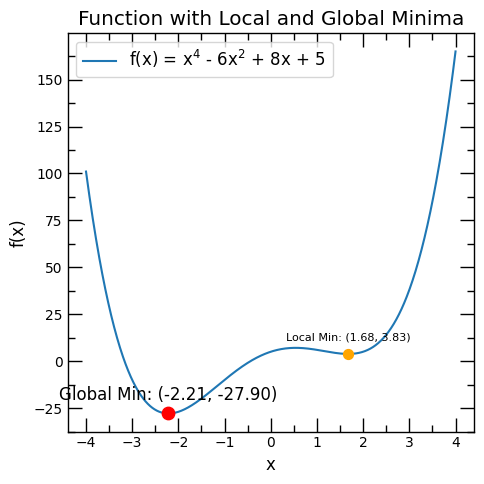

In [18]:
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Define the function to plot (a more complex one with local minima)
def f(x):
    return x**4 - 8*x**2 + 8*x + 5

# Generate x values with more density for better minima detection
x = np.linspace(-4, 4, 1000)
y = f(x)

# Find local minima using scipy's argrelextrema
# Using order parameter to look at more neighboring points
local_min_indices = argrelextrema(y, np.less, order=20)[0]
local_min_x = x[local_min_indices]
local_min_y = y[local_min_indices]

# Find global minimum
global_min_index = np.argmin(y)
global_min_x = x[global_min_index]
global_min_y = y[global_min_index]

# Create the plot with the styling consistent with other plots
plt.figure(figsize=(5, 5))

# Apply consistent styling from previous cells
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='major', length=10, width=1.0, direction='in', labelsize=10)
ax.tick_params(which='minor', length=5, width=1.0, direction='in', labelsize=8, top=True, right=True)
ax.tick_params(top=True, right=True)

# Plot the function
plt.plot(x, y, label='f(x) = x$^4$ - 6x$^2$ + 8x + 5')

# Plot all local minima
for i, (min_x, min_y) in enumerate(zip(local_min_x, local_min_y)):
    if abs(min_y - global_min_y) > 1e-6:  # Not the global minimum
        plt.scatter(min_x, min_y, color='orange', s=50, zorder=5)
        plt.annotate(f'Local Min: ({min_x:.2f}, {min_y:.2f})', 
                    (min_x, min_y), 
                    textcoords="offset points",
                    xytext=(0,10), 
                    ha='center',
                    fontsize=8)

# Highlight global minimum
plt.scatter(global_min_x, global_min_y, color='red', s=80, zorder=5)
plt.annotate(f'Global Min: ({global_min_x:.2f}, {global_min_y:.2f})', 
            (global_min_x, global_min_y), 
            textcoords="offset points",
            xytext=(0,10), 
            ha='center')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function with Local and Global Minima')
plt.legend()
plt.tight_layout()
plt.savefig('function_with_minima.pdf')
plt.show()

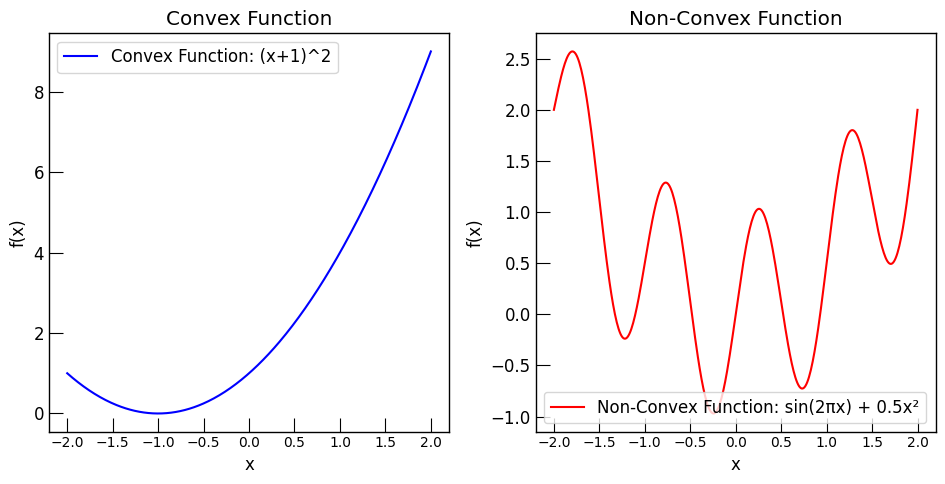

In [6]:
import numpy as np

import matplotlib.pyplot as plt

# Define a convex function (e.g., quadratic function)
def convex_function(x):
    return x**2 + 2*x + 1  # Example: (x+1)^2

# Define a non-convex function (e.g., sinusoidal function with additional terms)
def non_convex_function(x):
    return np.sin(2 * np.pi * x) + 0.5 * x**2

# Generate x values
x = np.linspace(-2, 2, 400)

# Compute y values for both functions
y_convex = convex_function(x)
y_non_convex = non_convex_function(x)

# Plot the functions
plt.figure(figsize=(10, 5))

# Plot convex function
plt.subplot(1, 2, 1)
plt.plot(x, y_convex, label='Convex Function: (x+1)^2', color='blue')
plt.title('Convex Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

# Plot non-convex function
plt.subplot(1, 2, 2)
plt.plot(x, y_non_convex, label='Non-Convex Function: sin(2πx) + 0.5x²', color='red')
plt.title('Non-Convex Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.tight_layout()
plt.savefig('convex_vs_non-convex.pdf')

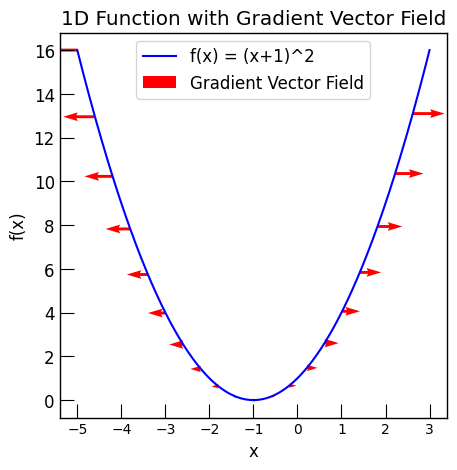

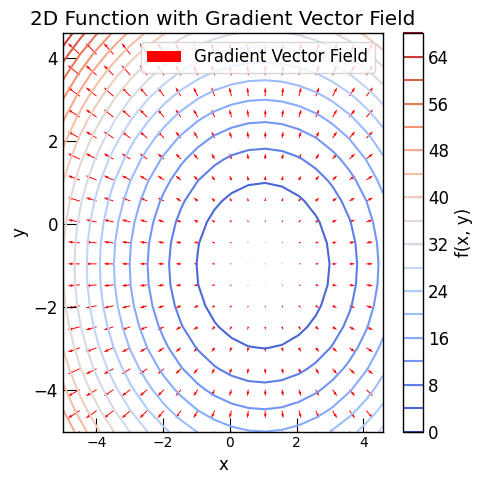

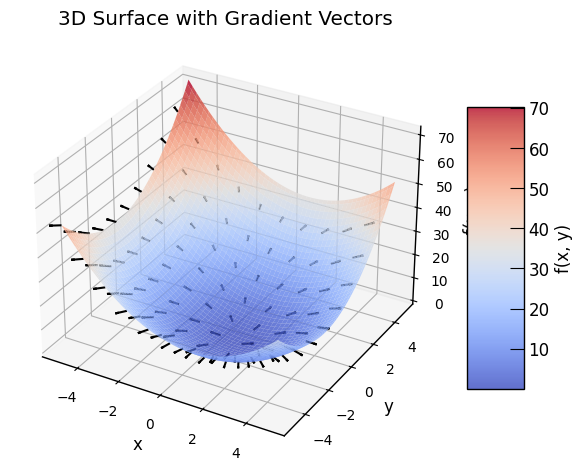

In [29]:
import numpy as np

import matplotlib.pyplot as plt
# 1D Example Function and Gradient
def f_1d(x):
    return x**2 + 2*x + 1  # Example: (x+1)^2

def grad_f_1d(x):
    return 2*x + 2  # Gradient of the function

# Generate x values for 1D
x_1d = np.linspace(-5, 3, 400)
y_1d = f_1d(x_1d)
grad_y_1d = grad_f_1d(x_1d)

# Show gradient as a vector field
step = 20  # Adjust step size to show fewer arrows
x_1d_arrows = x_1d[::step]
y_1d_arrows = f_1d(x_1d_arrows)
grad_y_1d_arrows = grad_f_1d(x_1d_arrows)

plt.figure(figsize=(5, 5))
plt.plot(x_1d, y_1d, label='f(x) = (x+1)^2', color='blue')
plt.quiver(x_1d_arrows, y_1d_arrows, grad_y_1d_arrows, np.zeros_like(x_1d_arrows), angles='xy', scale_units='xy', scale=10, color='red', label="Gradient Vector Field")
plt.title('1D Function with Gradient Vector Field')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.savefig('1d_gradient.pdf')


# 2D Example Function and Gradient
def f_2d(x, y):
    return (x - 1)**2 + (y + 1)**2  # Example: A simple quadratic bowl

def grad_f_2d(x, y):
    df_dx = 2 * (x - 1)
    df_dy = 2 * (y + 1)
    return np.array([df_dx, df_dy])

# Define the range for x_2d and y_2d
x_2d = np.linspace(-5, 5, 100)
y_2d = np.linspace(-5, 5, 100)

# Adjust the step size for the vector field to show fewer arrows
step = 5
X, Y = np.meshgrid(x_2d[::step], y_2d[::step])
Z = f_2d(X, Y)

# Compute gradients
grad_X, grad_Y = grad_f_2d(X, Y)

# Plot 2D function and gradient on the same figure
plt.figure(figsize=(5, 5))

# Plot the 2D function as a contour plot
plt.contour(X, Y, Z, levels=20, cmap='coolwarm')
plt.colorbar(label='f(x, y)')

# Overlay the gradient vector field
plt.quiver(X, Y, grad_X, grad_Y, color='red', label='Gradient Vector Field')

plt.title('2D Function with Gradient Vector Field')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.savefig('2d_gradient.pdf')

# Create 3D visualization of the 2D gradient
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Create a finer mesh for the surface
x_surf = np.linspace(-5, 5, 100)
y_surf = np.linspace(-5, 5, 100)
X_surf, Y_surf = np.meshgrid(x_surf, y_surf)
Z_surf = f_2d(X_surf, Y_surf)

# Plot the surface
surf = ax.plot_surface(X_surf, Y_surf, Z_surf, cmap='coolwarm', alpha=0.8, edgecolor='none')

# Sample points for gradient vectors (less dense than the contour plot)
step_3d = 2
X_arrows = X[::step_3d, ::step_3d]
Y_arrows = Y[::step_3d, ::step_3d]
Z_arrows = f_2d(X_arrows, Y_arrows)

# Compute gradients at these points
U, V = grad_f_2d(X_arrows, Y_arrows)
# Set a small value for the z-component of the gradient vectors
W = np.zeros_like(U)

# Scale the gradient vectors for visibility
scale = 0.5
U = scale * U
V = scale * V

# Plot the gradient vectors
ax.quiver(X_arrows, Y_arrows, Z_arrows, U, V, W, color='black', length=0.5, normalize=True)

# Add labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('3D Surface with Gradient Vectors')

# Add a colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='f(x, y)')

plt.tight_layout()
plt.savefig('3d_gradient.pdf')
plt.show()



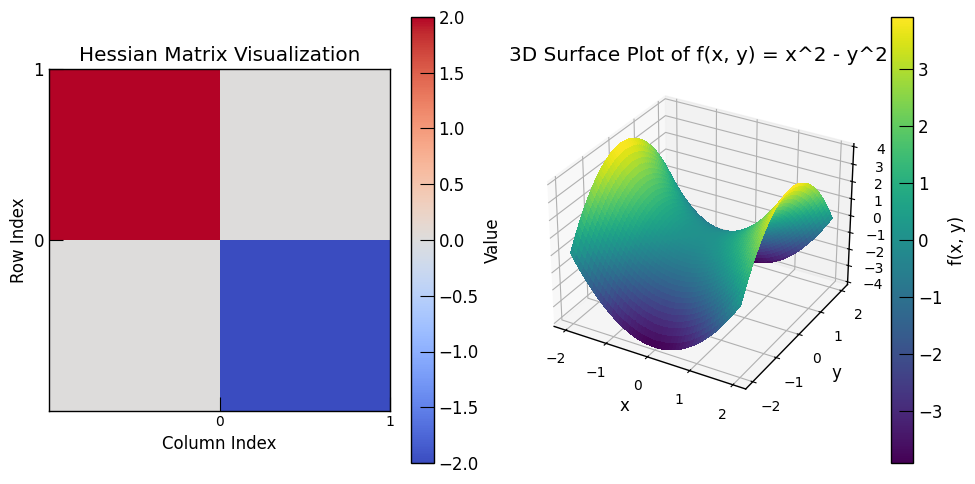

In [26]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Define a more complex function (e.g., a saddle point)
def f(x, y):
    return x**2 - y**2  # Saddle point function

# Calculate the Hessian matrix (constant for this function)
hessian = np.array([[2, 0], [0, -2]])

# Visualize the Hessian as a matrix (you can display it using imshow)
plt.figure(figsize=(10, 5))

# First subplot for the Hessian matrix
plt.subplot(1, 2, 1)
plt.imshow(hessian, extent=[-1, 1, -1, 1], origin='upper', cmap='coolwarm', vmin=-2, vmax=2)  # Use coolwarm colormap
plt.colorbar(label='Value')
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.title('Hessian Matrix Visualization')

# Second subplot for the 3D surface plot
plt.subplot(1, 2, 2, projection='3d')
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

surf = plt.gca().plot_surface(X, Y, Z, cmap=cm.viridis, linewidth=0, antialiased=False)
plt.xlabel('x')
plt.ylabel('y')
plt.title('3D Surface Plot of f(x, y) = x^2 - y^2')
plt.colorbar(surf, label='f(x, y)')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig('hessian_saddle.pdf')
plt.show()

/var/folders/b4/hm0mlm2x6_g1cbpp4c29f62h0000gn/T/ipykernel_23667/1206970925.py:44: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



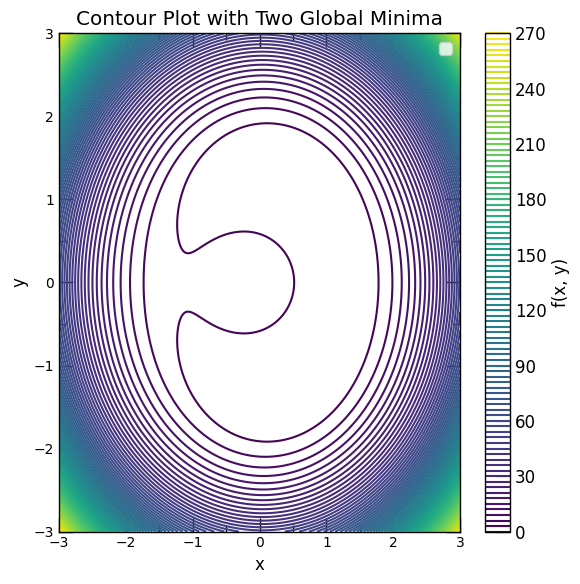

In [75]:
import numpy as np
from matplotlib.ticker import AutoMinorLocator

import matplotlib.pyplot as plt

# Define the function to plot (a more complex one with two minima)
def f(x, y):
    return (x**2 + y**2 - 2)**2 + (x - 0.5)**2 # Two minima at (1, 0) and (-1, 0)

# Generate x and y values
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Find global minima (approximate)
# x_min1, y_min1 = 1, 0
# x_min2, y_min2 = -1, 0
# z_min1 = f(x_min1, y_min1)
# z_min2 = f(x_min2, y_min2)

# Create the plot with the styling consistent with other plots
plt.figure(figsize=(6, 6))

# Apply consistent styling from previous cells
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='major', length=10, width=1.0, direction='in', labelsize=10)
ax.tick_params(which='minor', length=5, width=1.0, direction='in', labelsize=8, top=True, right=True)
ax.tick_params(top=True, right=True)

# Plot the contour
contour = plt.contour(X, Y, Z, levels=100, cmap='viridis')
plt.colorbar(contour, label='f(x, y)')

# Highlight global minima
# plt.scatter(x_min1, y_min1, color='red', s=80, zorder=5, label='Global Minima')
# plt.scatter(x_min2, y_min2, color='red', s=80, zorder=5)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot with Two Global Minima')
plt.legend()
plt.tight_layout()
plt.savefig('contour_with_minima.pdf')
plt.show()

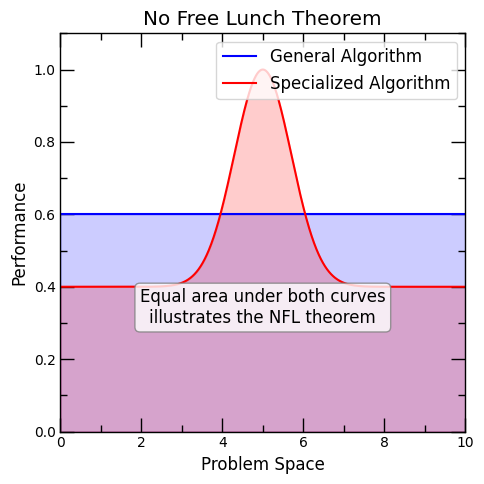

In [76]:
import numpy as np
from matplotlib.ticker import AutoMinorLocator

import matplotlib.pyplot as plt

# Define the problem space
problem_space = np.linspace(0, 10, 1000)

# Define two algorithms
# Algorithm 1: Consistent moderate performance across all problems
algorithm1_performance = np.ones_like(problem_space) * 0.6  

# Algorithm 2: High performance in a specific domain, poor elsewhere
algorithm2_performance = 0.4 + 0.6 * np.exp(-((problem_space - 5)**2) / 1.0)

# Create the plot with consistent styling from previous cells
fig, ax = plt.subplots(figsize=(5, 5))

# Apply consistent styling from previous cells
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='major', length=10, width=1.0, direction='in', labelsize=10)
ax.tick_params(which='minor', length=5, width=1.0, direction='in', labelsize=8, top=True, right=True)
ax.tick_params(top=True, right=True)

# Plot the algorithm performances
ax.plot(problem_space, algorithm1_performance, 'b-', label='General Algorithm')
ax.plot(problem_space, algorithm2_performance, 'r-', label='Specialized Algorithm')

# Fill the area under the curves to highlight the tradeoff
ax.fill_between(problem_space, 0, algorithm1_performance, color='blue', alpha=0.2)
ax.fill_between(problem_space, 0, algorithm2_performance, color='red', alpha=0.2)

# Add labels and title
ax.set_xlabel('Problem Space')
ax.set_ylabel('Performance')
ax.set_title('No Free Lunch Theorem')
ax.set_ylim(0, 1.1)
ax.set_xlim(0, 10)
ax.legend(loc='upper right')

# Add explanation text
ax.text(5, 0.3, "Equal area under both curves\nillustrates the NFL theorem", 
    ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.savefig('no_free_lunch_theorem.pdf')
plt.show()